# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
weather_api_key = "4b0e3b0aab2982b37f2f4173ef8a6955"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [8]:
cities


['butaritari',
 'albany',
 'pizarro',
 'mayumba',
 'ostrovnoy',
 'barentsburg',
 'bengkulu',
 'jamestown',
 'taolanaro',
 'truth or consequences',
 'dikson',
 'ribeira grande',
 'bredasdorp',
 'altay',
 'llangefni',
 'avarua',
 'mataura',
 'yala',
 'jiamusi',
 'mys shmidta',
 'vad',
 'hobart',
 'yellowknife',
 'katsuura',
 'tuktoyaktuk',
 'yar-sale',
 'thompson',
 'grants',
 'cidreira',
 'qaqortoq',
 'cape town',
 'sao filipe',
 'mar del plata',
 'maneadero',
 'umzimvubu',
 'vaitupu',
 'bluff',
 'kapaa',
 'vaini',
 'rikitea',
 'arlit',
 'mana',
 'busselton',
 'pangnirtung',
 'illoqqortoormiut',
 'georgetown',
 'duvan',
 'niquero',
 'ushuaia',
 'la ronge',
 'andros',
 'rawlins',
 'kavieng',
 'sorland',
 'ahipara',
 'puerto ayora',
 'geraldton',
 'athabasca',
 'norman wells',
 'dingle',
 'saint-philippe',
 'grindavik',
 'bambous virieux',
 'champerico',
 'cervo',
 'aguimes',
 'poya',
 'ponta do sol',
 'lebu',
 'airai',
 'tasiilaq',
 'havre-saint-pierre',
 'bargal',
 'atuona',
 'saleaula'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
lat = []
lng = []
max_temp =[]
humidity = []
cloud = []
wind_speed = []
country = []
date = []
city_name = []
x = 1

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        print(f"Processing Record {x} of {len(cities)} | {city}")
    except:
        print("City not found. Skipping....")
    x=x+1

print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")
    


Processing Record 1 of 617 | butaritari
Processing Record 2 of 617 | albany
Processing Record 3 of 617 | pizarro
Processing Record 4 of 617 | mayumba
Processing Record 5 of 617 | ostrovnoy
City not found. Skipping....
Processing Record 7 of 617 | bengkulu
Processing Record 8 of 617 | jamestown
City not found. Skipping....
Processing Record 10 of 617 | truth or consequences
Processing Record 11 of 617 | dikson
Processing Record 12 of 617 | ribeira grande
Processing Record 13 of 617 | bredasdorp
Processing Record 14 of 617 | altay
Processing Record 15 of 617 | llangefni
Processing Record 16 of 617 | avarua
Processing Record 17 of 617 | mataura
Processing Record 18 of 617 | yala
Processing Record 19 of 617 | jiamusi
City not found. Skipping....
Processing Record 21 of 617 | vad
Processing Record 22 of 617 | hobart
Processing Record 23 of 617 | yellowknife
Processing Record 24 of 617 | katsuura
Processing Record 25 of 617 | tuktoyaktuk
Processing Record 26 of 617 | yar-sale
Processing Reco

Processing Record 215 of 617 | abalak
Processing Record 216 of 617 | fortuna
Processing Record 217 of 617 | ourossogui
Processing Record 218 of 617 | cockburn town
Processing Record 219 of 617 | lufilufi
Processing Record 220 of 617 | tiksi
Processing Record 221 of 617 | paracuru
Processing Record 222 of 617 | port elizabeth
Processing Record 223 of 617 | codrington
Processing Record 224 of 617 | ewo
Processing Record 225 of 617 | korla
Processing Record 226 of 617 | palmerston
Processing Record 227 of 617 | touros
Processing Record 228 of 617 | tautira
Processing Record 229 of 617 | kaitangata
Processing Record 230 of 617 | san cristobal
Processing Record 231 of 617 | esperance
Processing Record 232 of 617 | compostela
City not found. Skipping....
Processing Record 234 of 617 | aswan
Processing Record 235 of 617 | fairbanks
Processing Record 236 of 617 | souillac
Processing Record 237 of 617 | koumac
Processing Record 238 of 617 | klaksvik
Processing Record 239 of 617 | huanren
Proces

Processing Record 423 of 617 | alugan
Processing Record 424 of 617 | sisophon
Processing Record 425 of 617 | hargeysa
Processing Record 426 of 617 | rawson
Processing Record 427 of 617 | dunedin
Processing Record 428 of 617 | khorramshahr
Processing Record 429 of 617 | fare
Processing Record 430 of 617 | stillwater
Processing Record 431 of 617 | antalaha
Processing Record 432 of 617 | ashington
Processing Record 433 of 617 | hualmay
Processing Record 434 of 617 | chokurdakh
Processing Record 435 of 617 | seryshevo
Processing Record 436 of 617 | bandiagara
Processing Record 437 of 617 | leningradskiy
Processing Record 438 of 617 | zarubino
Processing Record 439 of 617 | butembo
Processing Record 440 of 617 | carballo
Processing Record 441 of 617 | taoudenni
City not found. Skipping....
Processing Record 443 of 617 | saint-joseph
Processing Record 444 of 617 | turukhansk
Processing Record 445 of 617 | alenquer
Processing Record 446 of 617 | dongsheng
Processing Record 447 of 617 | southb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_df = pd.DataFrame({"City": city_name, "Lat":lat, "Lng":lng,"Max Temp": max_temp, 
                           "Humidity":humidity, "Cloudiness": cloud, "Wind Speed": wind_speed, 
                          "Country":country, "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,27.59,78,97,7.63,KI,1604072907
1,Albany,42.60,-73.97,1.11,88,100,3.25,US,1604072813
2,Pizarro,4.95,-77.37,27.77,73,18,3.28,CO,1604073104
3,Mayumba,-3.43,10.66,25.13,90,95,4.25,GA,1604073104
4,Ostrovnoy,68.05,39.51,1.35,89,63,8.93,RU,1604072885


In [31]:
weather_df.to_csv('output.csv', index = False)

In [28]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.663628,15.223345,15.591381,71.787611,53.021239,3.712584,1.604073e+09
std,32.952300,91.522207,12.812438,20.664344,38.149569,2.712170,8.314220e+01
min,-54.800000,-175.200000,-24.490000,1.000000,0.000000,0.150000,1.604073e+09
25%,-7.630000,-66.870000,5.290000,63.000000,13.000000,1.750000,1.604073e+09
50%,22.340000,18.920000,19.440000,76.000000,60.000000,3.100000,1.604073e+09
75%,47.870000,99.180000,26.000000,88.000000,90.000000,5.010000,1.604073e+09
max,77.480000,179.320000,42.000000,100.000000,100.000000,15.090000,1.604073e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

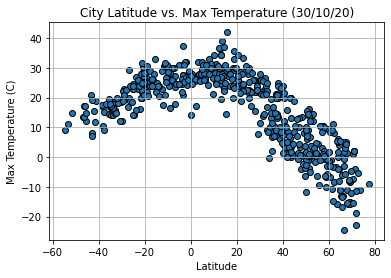

In [39]:
latitude = weather_df['Lat']
temperature = weather_df['Max Temp']

plt.scatter(latitude, temperature, edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (30/10/20)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

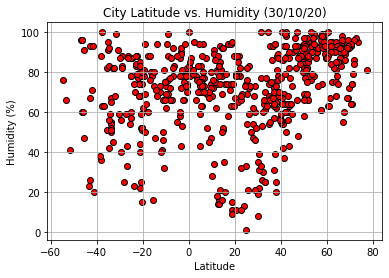

In [41]:
latitude = weather_df['Lat']
humidity = weather_df['Humidity']

plt.scatter(latitude, humidity, facecolor = 'red',edgecolor = "black")
plt.title("City Latitude vs. Humidity (30/10/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

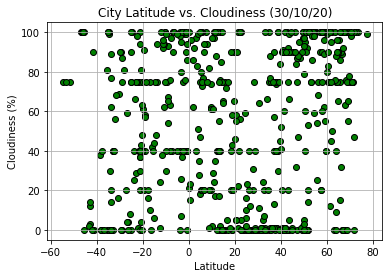

In [42]:
latitude = weather_df['Lat']
cloudiness = weather_df['Cloudiness']

plt.scatter(latitude, cloudiness, facecolor = 'green',edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (30/10/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

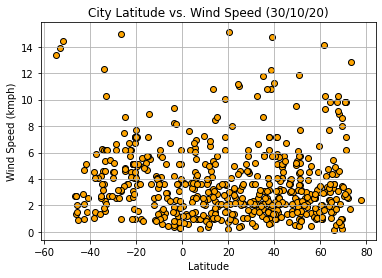

In [44]:
latitude = weather_df['Lat']
wind_speed = weather_df['Wind Speed']

plt.scatter(latitude, wind_speed, facecolor = 'orange',edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (30/10/20)")
plt.ylabel("Wind Speed (kmph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


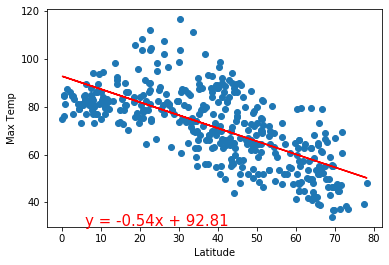

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


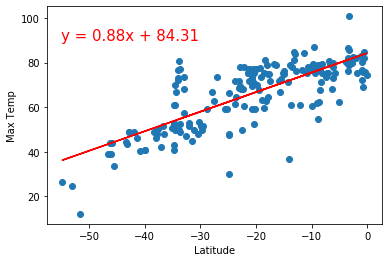

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


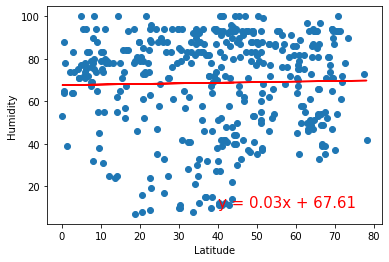

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


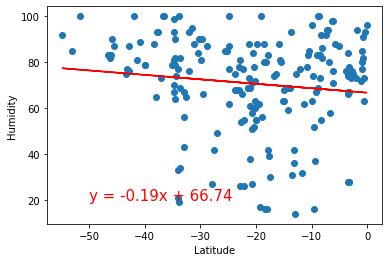

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


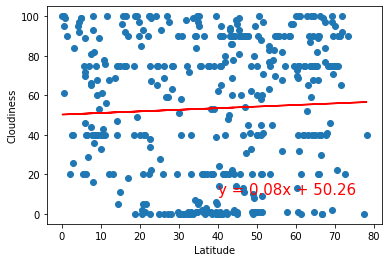

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


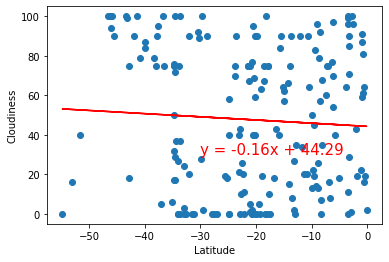

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


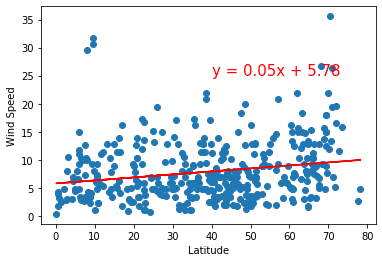

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


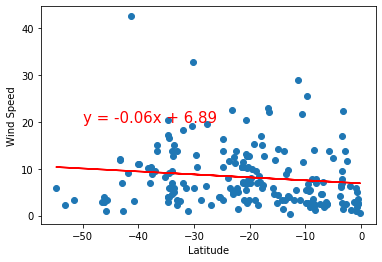